Cubic equation: y = 0.046676x^3 + -1.041207x^2 + 7.143817x + -11.488707
r² = 0.828981
sy/x = 0.570031


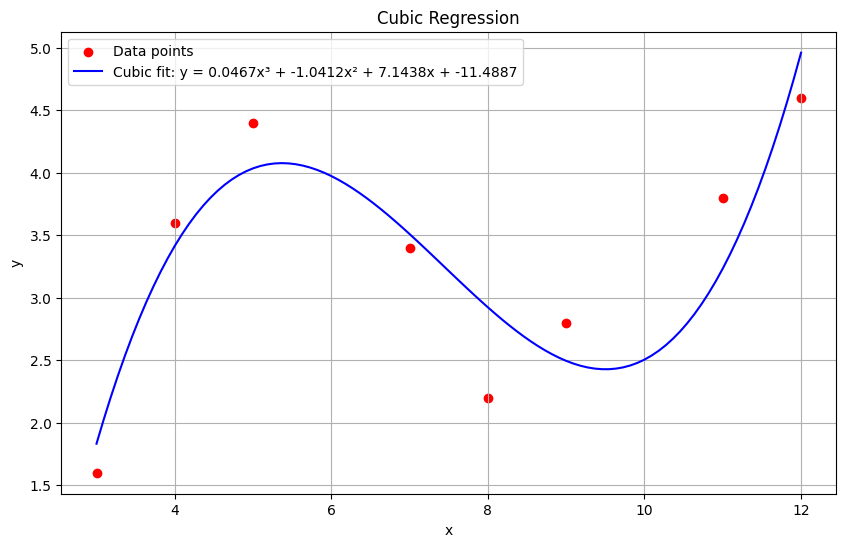


Residuals:
x = 3, y = 1.6000, y_pred = 1.8321, residual = -0.2321
x = 4, y = 3.6000, y_pred = 3.4145, residual = 0.1855
x = 5, y = 4.4000, y_pred = 4.0347, residual = 0.3653
x = 7, y = 3.4000, y_pred = 3.5087, residual = -0.1087
x = 8, y = 2.2000, y_pred = 2.9227, residual = -0.7227
x = 9, y = 2.8000, y_pred = 2.4947, residual = 0.3053
x = 11, y = 3.8000, y_pred = 3.2330, residual = 0.5670
x = 12, y = 4.6000, y_pred = 4.9595, residual = -0.3595


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Given data
x = np.array([3, 4, 5, 7, 8, 9, 11, 12])
y = np.array([1.6, 3.6, 4.4, 3.4, 2.2, 2.8, 3.8, 4.6])

# Fit cubic equation: y = ax^3 + bx^2 + cx + d
A = np.column_stack([x**3, x**2, x, np.ones(len(x))])
coefficients = np.linalg.lstsq(A, y, rcond=None)[0]

a, b, c, d = coefficients
print(f"Cubic equation: y = {a:.6f}x^3 + {b:.6f}x^2 + {c:.6f}x + {d:.6f}")

# Generate predicted values
y_pred = a * x**3 + b * x**2 + c * x + d

# Calculate r^2 (coefficient of determination)
r_squared = r2_score(y, y_pred)
print(f"r² = {r_squared:.6f}")

# Calculate sy/x (standard error of the estimate)
n = len(x)
p = 4  # number of parameters in the model (a, b, c, d)
residuals = y - y_pred
ss_residuals = np.sum(residuals**2)
sy_x = np.sqrt(ss_residuals / (n - p))
print(f"sy/x = {sy_x:.6f}")

# Create smooth curve for plotting
x_curve = np.linspace(min(x), max(x), 100)
y_curve = a * x_curve**3 + b * x_curve**2 + c * x_curve + d

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, color='blue', label=f'Cubic fit: y = {a:.4f}x³ + {b:.4f}x² + {c:.4f}x + {d:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Regression')
plt.grid(True)
plt.legend()
plt.show()

# Print out the residuals
print("\nResiduals:")
for i in range(len(x)):
    print(f"x = {x[i]}, y = {y[i]:.4f}, y_pred = {y_pred[i]:.4f}, residual = {residuals[i]:.4f}")

Optimized parameters:
a₄ = 0.389520
β₄ = -156.658110

Standard errors:
SE(a₄) = 0.257530
SE(β₄) = 473501152.411055

r² = -2.047147
sy/x = 0.871046


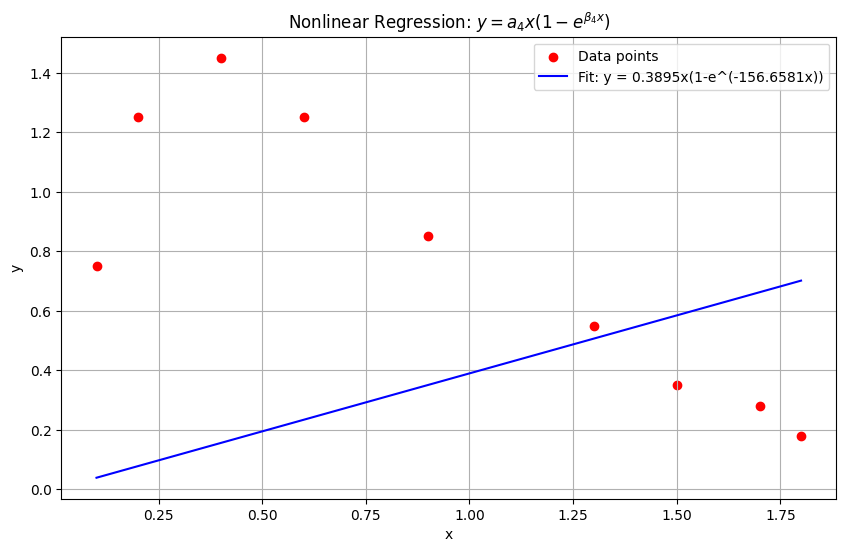


Residuals:
x = 0.1, y = 0.7500, y_pred = 0.0390, residual = 0.7110
x = 0.2, y = 1.2500, y_pred = 0.0779, residual = 1.1721
x = 0.4, y = 1.4500, y_pred = 0.1558, residual = 1.2942
x = 0.6, y = 1.2500, y_pred = 0.2337, residual = 1.0163
x = 0.9, y = 0.8500, y_pred = 0.3506, residual = 0.4994
x = 1.3, y = 0.5500, y_pred = 0.5064, residual = 0.0436
x = 1.5, y = 0.3500, y_pred = 0.5843, residual = -0.2343
x = 1.7, y = 0.2800, y_pred = 0.6622, residual = -0.3822
x = 1.8, y = 0.1800, y_pred = 0.7011, residual = -0.5211


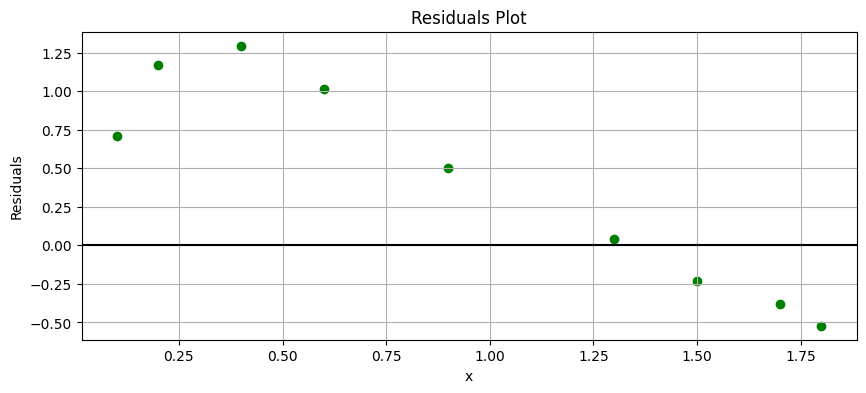

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the function y = a₄x(1-e^(β₄x))
def model_function(x, a4, beta4):
    return a4 * x * (1 - np.exp(beta4 * x))

# Given data
x_data = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])
y_data = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])

# Initial parameter guesses (important for nonlinear regression)
initial_guesses = [5.0, -2.0]  # Initial guesses for a4 and beta4

# Perform nonlinear regression
params, covariance = curve_fit(model_function, x_data, y_data, p0=initial_guesses)

# Extract the optimized parameters
a4_opt, beta4_opt = params
print(f"Optimized parameters:")
print(f"a₄ = {a4_opt:.6f}")
print(f"β₄ = {beta4_opt:.6f}")

# Calculate the confidence intervals (95%)
perr = np.sqrt(np.diag(covariance))
print(f"\nStandard errors:")
print(f"SE(a₄) = {perr[0]:.6f}")
print(f"SE(β₄) = {perr[1]:.6f}")

# Generate predicted y values using the optimized parameters
y_pred = model_function(x_data, a4_opt, beta4_opt)

# Calculate r² (coefficient of determination)
r_squared = r2_score(y_data, y_pred)
print(f"\nr² = {r_squared:.6f}")

# Calculate sy/x (standard error of the estimate)
n = len(x_data)
p = 2  # number of parameters in the model (a4, beta4)
residuals = y_data - y_pred
ss_residuals = np.sum(residuals**2)
sy_x = np.sqrt(ss_residuals / (n - p))
print(f"sy/x = {sy_x:.6f}")

# Create smooth curve for plotting
x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve = model_function(x_curve, a4_opt, beta4_opt)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Data points')
plt.plot(x_curve, y_curve, color='blue',
         label=f'Fit: y = {a4_opt:.4f}x(1-e^({beta4_opt:.4f}x))')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Regression: $y = a_4x(1-e^{\\beta_4x})$')
plt.grid(True)
plt.legend()
plt.show()

# Print out the residuals
print("\nResiduals:")
for i in range(len(x_data)):
    print(f"x = {x_data[i]}, y = {y_data[i]:.4f}, y_pred = {y_pred[i]:.4f}, residual = {residuals[i]:.4f}")

# Plot the residuals
plt.figure(figsize=(10, 4))
plt.scatter(x_data, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()